# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style(style='darkgrid')

** Read in the Titanic data **

In [3]:
train = pd.read_csv("titanic_train.csv")

In [4]:
test = pd.read_csv("titanic_test.csv")

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [348]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


** Exploratory Data Analysis **

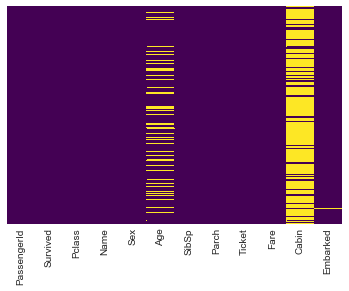

In [349]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

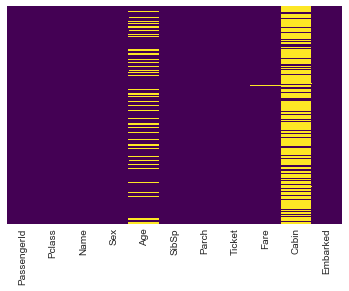

In [350]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [351]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [352]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [353]:
test['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

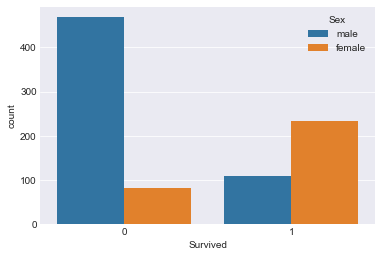

In [354]:
sns.countplot(x='Survived', data=train, hue='Sex')

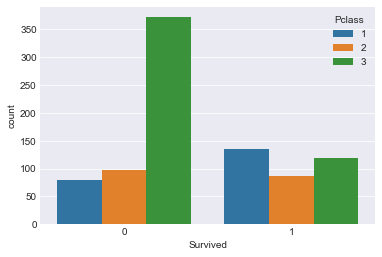

In [355]:
sns.countplot(x='Survived', data=train, hue='Pclass')

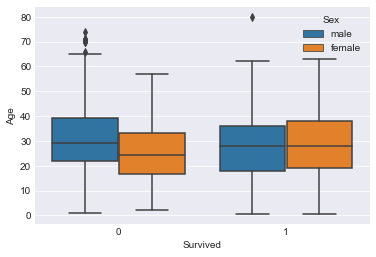

In [356]:
sns.boxplot(x='Survived', y='Age', data=train, hue='Sex')

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


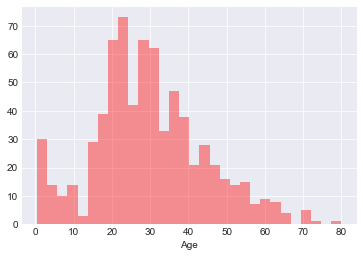

In [357]:
sns.distplot(train['Age'].dropna(), bins=30, kde=False, color='red')

Text(0.5,1,'Age Distribution, Training Data')

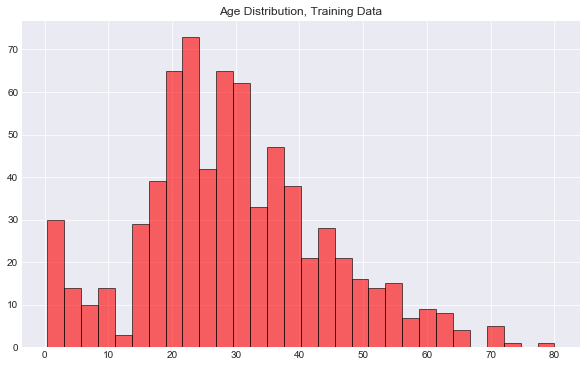

In [358]:
train['Age'].hist(bins=30, alpha=0.6, color='red', ec='black', figsize=(10,6))
plt.title('Age Distribution, Training Data')

Text(0.5,1,'Age Distribution, Test Data')

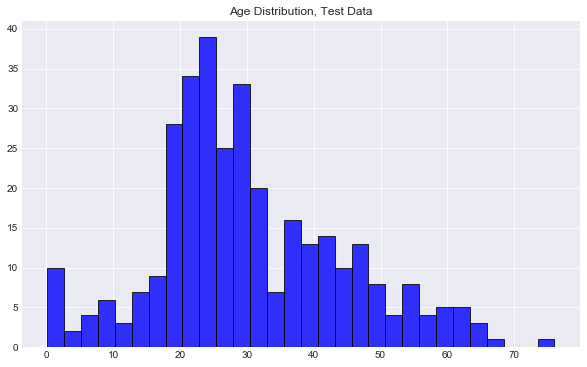

In [359]:
test['Age'].hist(bins=30, alpha=0.8, color='blue', ec='black', figsize=(10,6))
plt.title('Age Distribution, Test Data')

In [360]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

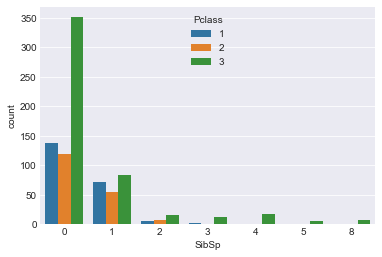

In [361]:
sns.countplot(x='SibSp', data=train, hue='Pclass')

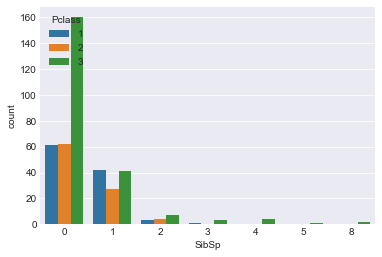

In [362]:
sns.countplot(x='SibSp', data=test, hue='Pclass')

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


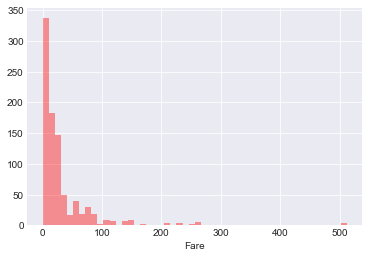

In [363]:
sns.distplot(train['Fare'], kde=False, color='red')

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


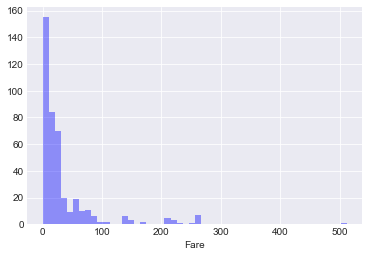

In [364]:
sns.distplot(test['Fare'].dropna(), kde=False, color='blue')

** Data Cleaning **

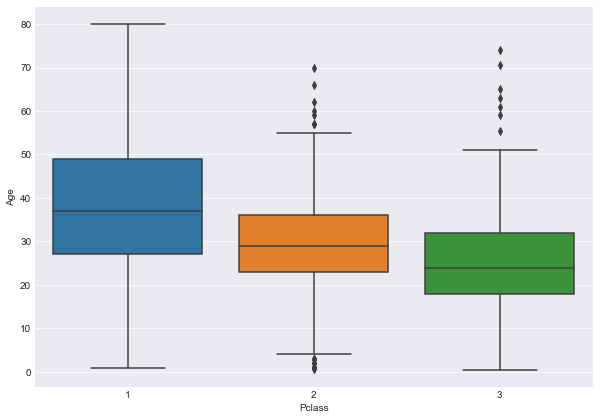

In [365]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

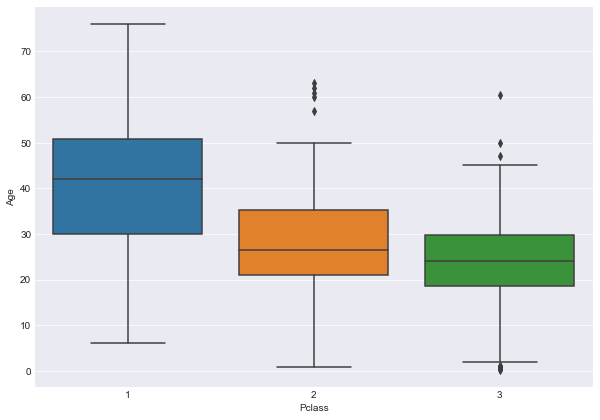

In [366]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=test)

In [367]:
# write a function to replace null values in Age for average based on class
# find averages based on class

In [368]:
age1 = int(round(np.mean(train[train['Pclass']==1])['Age']))
age2 = int(round(np.mean(train[train['Pclass']==2])['Age']))
age3 = int(round(np.mean(train[train['Pclass']==3])['Age']))
print(age1, age2, age3)

38 30 25


In [369]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return age1
        elif Pclass == 2:
            return age2
        else:
            return age3
    else:
        return Age

In [370]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [371]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

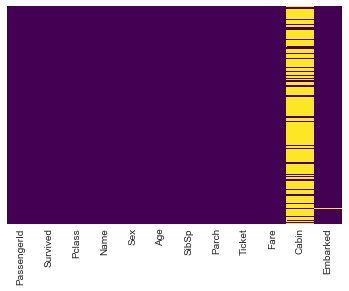

In [372]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

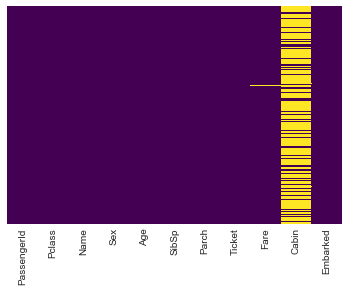

In [373]:
sns.heatmap(data=test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [374]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [375]:
train.dropna(inplace=True)
test.dropna(inplace=True)

Convert categorical columns with Dummy Variables

In [376]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [377]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [378]:
train = pd.concat([train, sex, embark], axis=1)

In [379]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [380]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [381]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [382]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [383]:
embark = pd.get_dummies(test['Embarked'], drop_first=True)

In [384]:
test = pd.concat([test, sex, embark], axis=1)

In [385]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [386]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [387]:
from sklearn.model_selection import train_test_split

In [388]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [389]:
from sklearn.linear_model import LogisticRegression

In [390]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [391]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [392]:
from sklearn.metrics import classification_report

In [393]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [394]:
from sklearn.metrics import confusion_matrix

In [395]:
print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 36  68]]


In [397]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [398]:
Predicted_Survived = logmodel.predict(test)

In [406]:
Predicited_Survived = pd.Series(Predicited_Survived)

In [407]:
type(Predicited_Survived)

pandas.core.series.Series

In [400]:
# test['Predicted Survived'] = Predicted_Survived

In [401]:
# Predicted_Surv_df = pd.DataFrame(Predicited_Survived)

In [402]:
surv_pred = pd.read_csv("titanic_test.csv")

In [408]:
surv_pred = pd.concat([Predicted_Survived, surv_pred], axis=1)

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [338]:
surv_pred.head(20)

,0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,0.0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0.0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0.0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1.0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,0.0,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,1.0,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,0.0,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,1.0,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,0.0,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S
